<img src="../../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

## _*Amplitude and Phase*_ 

The latest version of this notebook is available on https://github.com/QISKit/qiskit-tutorial.

***
### Contributors
Jay Gambetta, Antonio Córcoles

## Introduction
In [superposition](superposition_and_entanglement.ipynb) we looked at the concept of computational states, and superpostion states. Here we continue the development of the understanding of a quantum state by introducing the concept of amplitude and phase. 

## A qubit 

The fundamental unit of quantum information is a qubit. It is a two-dimensional vector space of the complex numbers $\mathbb{C}^2$. A qubit has some similarities to a classical bit, but is overall very different. Like a bit, a qubit can have two possible values - normally a 0 or a 1 which we denote $|0\rangle$ and $|1\rangle$. The difference is that whereas a bit must be either 0 or 1, a qubit can be 0, 1, or a superpostion of both. An arbitrary pure state of the qubit can be written as 

$$ |\psi\rangle = \alpha |0\rangle + \beta |1\rangle$$

where $\alpha$ and $\beta$ are complex numbers. When a qubit in the state $|\psi\rangle$ is measured, the result is not deterministic, and one obtains the state $|0\rangle$ with probability $|\alpha|^2$ and the state $|1\rangle$ with probability $|\beta|^2$. This imposes the constrain that $|\alpha|^2 + |\beta|^2=1$ from conservation of probability. We can now define a pure state for a qubit as 

$$ |\psi\rangle = \cos(\theta/2)|0\rangle + e^{i\phi} \sin(\theta/2) |1\rangle$$

where $0\leq \phi < 2\pi$ and $0 \leq \theta \leq \pi$. 


Quantum gates for a qubit are represented as a $2\times2$ unitary matrix $U$. The action on the quantum gate is found by

$$ |\psi'\rangle = U |\psi \rangle $$ and the most general unitary must be able to take $|0\rangle$ to the above state. 
This gives 

$$U = \begin{pmatrix} \cos(\theta/2) & a \\ e^{i\phi}\sin(\theta/2) & b \end{pmatrix}$$ 

where $a$ and $b$ are complex numbers constrained such that $U^\dagger U = I$ for all $0\leq \theta \leq \pi$ and $0\leq\phi < 2\pi$. This gives 3 constraints and as such $a\rightarrow -e^{i\lambda} \sin(\theta/2)$ and $b \rightarrow e^{i\lambda + i \phi} \cos(\theta/2)$ where $0\leq \lambda < 2\pi$

$$U = \begin{pmatrix} \cos(\theta/2) & -e^{i\lambda} \sin(\theta/2) \\ e^{i\phi}\sin(\theta/2) & e^{i\lambda + i \phi} \cos(\theta/2) \end{pmatrix}$$ 

This allows us to define a general single-qubit rotation as a function of the three parameters $\theta$, $\phi$ and $\lambda$, $U(\theta, \phi, \lambda)$

It is generally useful to understand general single-qubit rotations in terms of a very special group of matrices called the Pauli matrices $X$, $Y$ and $Z$. We already saw in [superposition](superposition.ipynb) that the $X$ Pauli matrix could be defined as 

$$ X =\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$

Similarly, we can also define 

$$ Y =\begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}$$

and

$$ Z =\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$

An important aspect of the Pauli matrices is that $X^2=Y^2=Z^2=I$. This allows us to simplify 

$$e^{i \theta P}=  \cos(\theta)I + i\sin(\theta)P$$

with $P$ a Pauli matrix. The Pauli matrices can be thus considered as the generators of rotations in the single-qubit space. We can then define the rotations

$$r_x(\theta) = e^{-i \theta/2 X} = \cos(\theta/2)I - i \sin(\theta/2)X = \begin{pmatrix} \cos(\theta/2) & -i\sin(\theta/2) \\ -i\sin(\theta/2) & \cos(\theta/2) \end{pmatrix}$$

$$r_y(\theta) = e^{-i \theta/2 Y} = \cos(\theta/2)I - i \sin(\theta/2)Y = \begin{pmatrix} \cos(\theta/2) & -\sin(\theta/2) \\ \sin(\theta/2) & \cos(\theta/2) \end{pmatrix}$$

$$r_z(\theta) = e^{-i \theta/2 Z} = \cos(\theta/2)I - i \sin(\theta/2)Z = \begin{pmatrix} e^{-i\theta/2} & 0 \\ 0 & e^{i\theta/2} \end{pmatrix} := \begin{pmatrix} 1 & 0 \\ 0 & e^{i\theta} \end{pmatrix}$$

And now, in terms of the previously defined $U(\theta, \phi, \lambda)$, we can define the parametrized rotations

$$u_3(\theta, \phi, \lambda) = U(\theta, \phi, \lambda) = r_z(\phi)r_y(\theta)r_z(\lambda) = \begin{pmatrix} e^{-i(\phi + \lambda)/2}\cos(\theta/2) & -e^{-i(\phi - \lambda)/2} \sin(\theta/2) \\ e^{i(\phi-\lambda)/2}\sin(\theta/2) & e^{i(\phi + \lambda)/2} \cos(\theta/2) \end{pmatrix}$$

where we have multiplied the above defined $U(\theta, \phi, \lambda)$ by a global phase $e^{-i(\phi + \lambda)/2}$

Similarly, we can define the parametrized rotations

$$u_2(\phi, \lambda) = U(\pi/2, \phi, \lambda)$$

and 

$$u_1(\lambda) = U(0,0,\lambda) := r_z(\lambda)$$

## Phase gates

Let's explore the action of some of the single-qubit gates we have just defined. We will start with the phase gate $u_1(\lambda)$. We can see from the gate matrix that this gate does not modify the state $|0\rangle$ and applies a phase of $\lambda$ to the state $|1\rangle$. In order for us to observe the effect of this gate on a qubit we need to make use of the Hadamard gate defined in [superposition](superposition.ipynb).

In [1]:
# useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer, IBMQ

# import basic plot tools
from qiskit.tools.visualization import matplotlib_circuit_drawer as circuit_drawer
from qiskit.tools.visualization import plot_histogram, qx_color_scheme

Following a Hadamard gate, we will perform a $u_1(\lambda)$ of varying angle $\lambda \in \{ - \pi, \pi \}$ and observe the qubit state oscillate between the states $|+\rangle$ ($X$ eigenvalue +1) and $|-\rangle$ ($X$ eigenvalue -1).

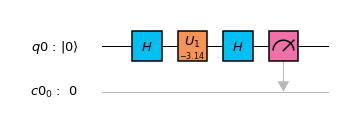

In [2]:
# Creating registers
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

circuits = []

# Creating the circuits
phase_vector = range(0,100)
for phase_index in phase_vector:
    phase_shift = phase_index-50
    phase = 2*np.pi*phase_shift/50
    circuit_name = "phase_gate_%d"%phase_index
    qc_phase_gate = QuantumCircuit(qr, cr, name=circuit_name)
    qc_phase_gate.h(qr)
    qc_phase_gate.u1(phase, qr)
    qc_phase_gate.h(qr)
    qc_phase_gate.measure(qr[0], cr[0])
    circuits.append(qc_phase_gate)

# Visualising one of the circuits as an example
circuit_drawer(circuits[25],style=qx_color_scheme())

In [3]:
# To run of qasm simulator
backend = Aer.get_backend('qasm_simulator')

# the number of shots in the experiment 
shots = 1024

result = execute(circuits, backend=backend, shots=shots).result()

In [4]:
probz = []
phase_value = []
for phase_index in phase_vector:
    phase_shift = phase_index - 50
    phase_value.append(2*phase_shift/50)
    if '0' in result.get_counts(circuits[phase_index]):
        probz.append(2*result.get_counts(circuits[phase_index]).get('0')/shots-1)
    else:
        probz.append(-1)

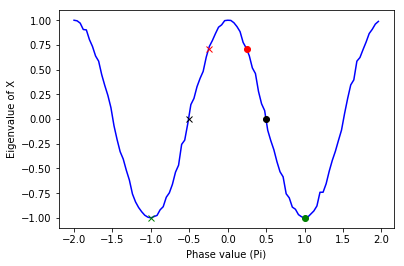

In [5]:
plt.plot(phase_value, probz, 'b',0.25,1/np.sqrt(2),'ro',0.5,0,'ko',1,-1,'go',-0.25,1/np.sqrt(2),'rx',-0.5,0,'kx',-1,-1,'gx')
plt.xlabel('Phase value (Pi)')
plt.ylabel('Eigenvalue of X')

plt.show()

We can see the eigenstate of $X$ oscillating between +1 and -1. The six symbols in the plot correspond to special gates that we use as part of our universal set of gates. These are $T$ ($T^{\dagger}$) for the red dot (cross), $S$ ($S^{\dagger}$) for the black dot (cross) and $Z$ ($Z^{\dagger}$) for the green dot (cross). Therefore, we can see that $T=u_1(\pi/4)$, $S=u_1(\pi/2)$ and $Z=u_1(\pi)$, with their adjoints corresponding to the negative arguments.

Now let's have a look at how the unitaries $u_3$ operate on a qubit state.

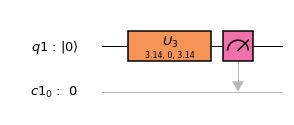

In [6]:
# Creating registers
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuits = []

# Creating the circuits
phase_vector = range(0,100)
for phase_index in phase_vector:
    phase_shift = phase_index-50
    phase = 2*np.pi*phase_shift/50
    circuit_name = "phase_gate_%d"%phase_index
    qc_phase_gate = QuantumCircuit(qr, cr, name=circuit_name)
    qc_phase_gate.u3(phase,0,np.pi, qr)
    qc_phase_gate.measure(qr[0], cr[0])
    circuits.append(qc_phase_gate)
    
# Visualising one of the circuits as an example
circuit_drawer(circuits[75],style=qx_color_scheme())

In [7]:
# To run of qasm simulator
backend = Aer.get_backend('qasm_simulator')

# the number of shots in the experiment 
shots = 1024

result = execute(circuits, backend=backend, shots=shots).result()

In [8]:
probz = []
phase_value = []
for phase_index in phase_vector:
    phase_shift = phase_index - 50
    phase_value.append(2*phase_shift/50)
    if '0' in result.get_counts(circuits[phase_index]):
        probz.append(2*result.get_counts(circuits[phase_index]).get('0')/shots-1)
    else:
        probz.append(-1)

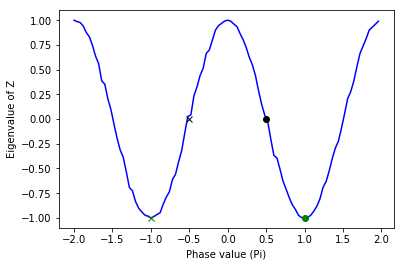

In [9]:
plt.plot(phase_value, probz, 'b',0.5,0,'ko',1,-1,'go',-0.5,0,'kx',-1,-1,'gx')
plt.xlabel('Phase value (Pi)')
plt.ylabel('Eigenvalue of Z')

plt.show()

In this case, we see that $u_3(\pi/2,0,\pi)$ corresponds to a $\pi/2$ rotation around $X$ (black dot) and $u_3(\pi,0,\pi)$ corresponds to a bit-flip around $X$ (green dot). The rotations in the negative directions are shown as crosses. We could also have implemented these rotations around the $Y$ axis by simply using $u_3(\lambda,\pi/2,\pi/2)$.

As an exercise, prove that the Hadamard gate can be implemented as $H = u_2(0, \pi)$.

Now you know about single qubit states, it's time to move onto multi-qubit states. Please continue to [entanglement](entanglement.ipynb) to explore further!